In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<disgten.Generator with input: 
n_particle: 20000
output:
  file: gpt.particles.gdf
  type: gpt
r_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_xy:
    units: mm
    value: 4
  type: rsg
random_type: hammersley
start:
  MTE:
    units: meV
    value: 150
  type: cathode
t_dist:
  alpha:
    units: dimensionless
    value: 0.0
  sigma_t:
    units: ps
    value: 25
  type: sg
total_charge:
  units: nC
  value: 1

>
Distribution format: gpt
Output file: gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 20000.
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
      Assuming cylindrical symmetry...
   t distribution: Super Gaussian
      simga_t = 25 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, 

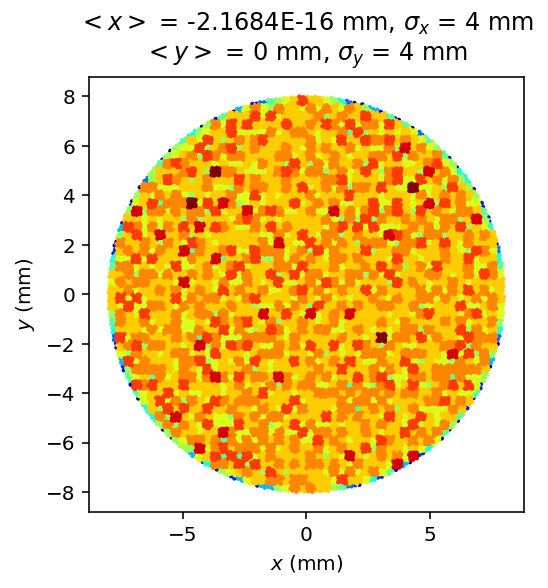

In [4]:
from distgen.generator import Generator
from distgen.plot import plot_dist2d, plot_current_profile

DISTGEN_INPUT_FILE = os.path.join(root,'templates/cu_injector/distgen.in.yaml')
gen = Generator(DISTGEN_INPUT_FILE,verbose=True)
print(gen)
beam = gen.beam()

units = {'x':'mm', 'y':'mm', 'px':'keV/c', 'py':'keV/c', 't':'ps', 'q':'nC', 'I':'A'}
plot_dist2d(beam, "x", units["x"], "y", units["y"], 'scatter_hist2d', nbins=50, axis="equal", title_on=True);

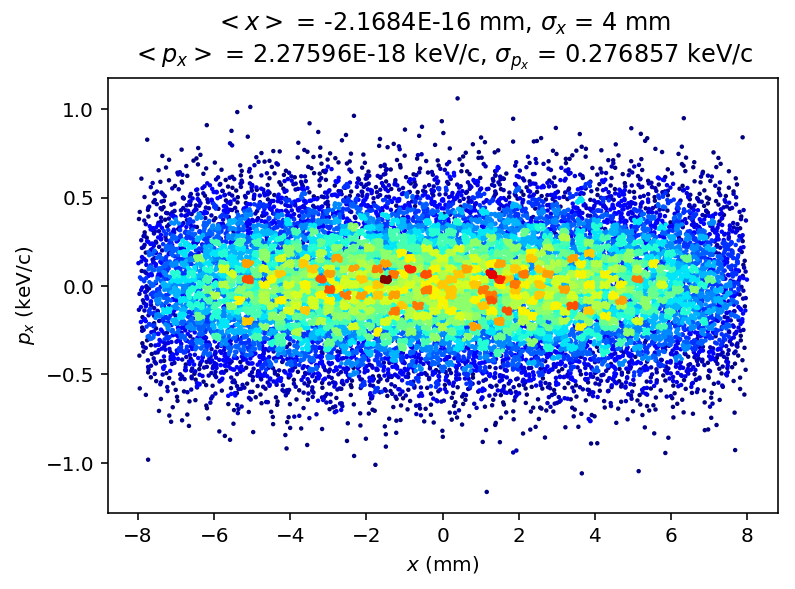

In [7]:
plot_dist2d(beam, "x",units["x"],"px",units["px"],'scatter_hist2d',nbins=75, title_on=True);

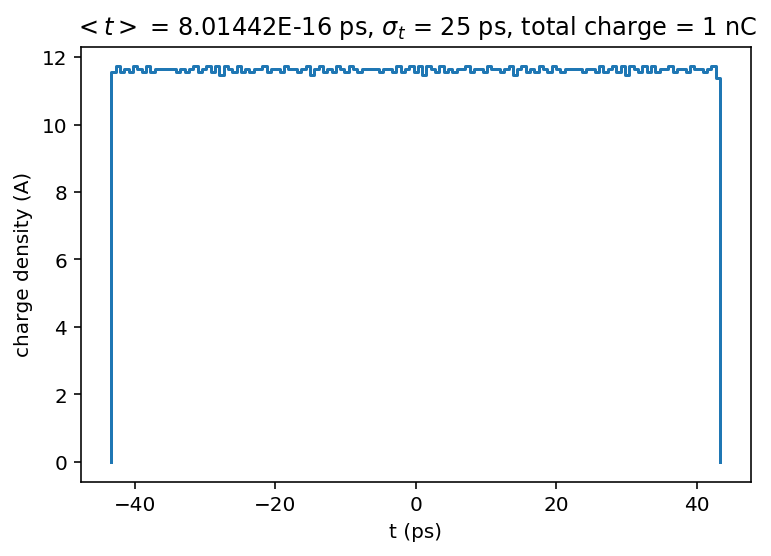

In [9]:
plot_current_profile(beam, units['t'], units['I'], title_on=True)

# Run with Distgen

In [10]:
from gpt.gpt_distgen import run_gpt_with_distgen

In [11]:
GPT_INPUT_FILE = os.path.join(root,'templates/cu_injector/gpt.in')
DISTGEN_INPUT_FILE = os.path.join(root,'templates/cu_injector/distgen.in.yaml')

settings={'n_particle':200, 
          'Ntout':500,
          'gun_voltage':400,
          'buncher_voltage':50,
          'phiCTB01_off':-90,
          'cavity_1_voltage':1000,
          'cavity_2_voltage':1000,
          'cavity_3_voltage':1000,
          'cavity_4_voltage':1000,
          'cavity_5_voltage':1000}

G = run_gpt_with_distgen(settings,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=True,
                         auto_phase=True)
print(G)

Run GPT with Distgen:
Replacing param n_particle with value 200
Ntout is in gpt
gun_voltage is in gpt
buncher_voltage is in gpt
phiCTB01_off is in gpt
cavity_1_voltage is in gpt
cavity_2_voltage is in gpt
cavity_3_voltage is in gpt
cavity_4_voltage is in gpt
cavity_5_voltage is in gpt
gpt.particles.gdf
Linking particle files, distgen output will point to -> "gpt.particles.gdf" in working directory.
Replacing Distgen output params

Distgen >------

Distribution format: gpt
Output file: /var/folders/t8/f3n1sdnn1jg0wfbpqfm1hsh80000gn/T/tmpd8n0gm8q/gpt.particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 1 nC.
   Number of macroparticles: 200.
   r distribution: SuperGaussianRad
      lambda = 5.65685 mm, power = INF
      Assuming cylindrical symmetry...
   t distribution: Super Gaussian
      simga_t = 25 ps, power = INF
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, 

SystemExit: ERROR: No screen output found. GPT crashed?

/Users/colwyngulliford/anaconda3/envs/lume-gpt/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
fig, ax = plt.subplots()
ax.plot(G.stat('mean_z'), G.stat('mean_kinetic_energy')/1e6)
ax.set_xlabel('mean_z (m)');
ax.set_ylabel('KE (MeV)');